### First Program

#### python program to display all header tags

In [385]:

from bs4 import BeautifulSoup
import requests


url_link = 'https://en.wikipedia.org/wiki/Main_Page'
request = requests.get(url_link)
 
Soup = BeautifulSoup(request.text, 'lxml')
 

heading_tags = ["h1", "h2", "h3","h4","h5"]
for tags in Soup.find_all(heading_tags):
    print(tags.name + ' - ' + tags.text.strip())

h1 - Main Page
h2 - From today's featured article
h2 - Did you know ...
h2 - In the news
h2 - On this day
h2 - Today's featured picture
h2 - Other areas of Wikipedia
h2 - Wikipedia's sister projects
h2 - Wikipedia languages
h2 - Navigation menu
h3 - Personal tools
h3 - Namespaces
h3 - Variants
h3 - Views
h3 - More
h3 - Search
h3 - Navigation
h3 - Contribute
h3 - Tools
h3 - Print/export
h3 - In other projects
h3 - Languages


### Second Program

####  Write a python program to display IMDB’s Top rated 100 movies’ data (i.e. Name, IMDB rating, Year of release).

In [386]:


## get name,imdb rating and year of release

import pandas as pd
from bs4 import BeautifulSoup
import requests


url_link = 'https://www.imdb.com/chart/top?ref_=nv_mv_100'
response = requests.get(url_link)
soup = BeautifulSoup(response.content,'lxml')

ratings =soup.find_all('td',class_="ratingColumn imdbRating")
main_block = soup.find_all('td',class_='titleColumn')
movie_name=[i.find('a').text for i in main_block]
year=[i.find('span').text.strip('()') for i in main_block]
rating=[i.text.strip('\n') for i in ratings]



df=pd.DataFrame(list(zip(movie_name,rating,year))[:100],columns=['name','imdb_rating','year_of_release'])
df

,name,imdb_rating,year_of_release
0,The Shawshank Redemption,9.2,1994
1,The Godfather,9.1,1972
2,The Godfather: Part II,9.0,1974
3,The Dark Knight,9.0,2008
4,12 Angry Men,8.9,1957
...,...,...,...
95,Jagten,8.3,2012
96,Requiem for a Dream,8.3,2000
97,Singin' in the Rain,8.3,1952
98,North by Northwest,8.3,1959


### Third Program

#### Write a python program to display IMDB’s Top rated 100 Indian movies’ data (i.e. Name, IMDB rating, Year of release).

In [60]:
from bs4 import BeautifulSoup
import requests


url_link = 'https://www.imdb.com/india/top-rated-indian-movies/'
response = requests.get(url_link)
soup = BeautifulSoup(response.content,'lxml')

ratings =soup.find_all('td',class_="ratingColumn imdbRating")
main_block = soup.find_all('td',class_='titleColumn')
movie_name=[i.find('a').text for i in main_block]
year=[i.find('span').text.strip('()') for i in main_block]
rating=[i.text.strip('\n') for i in ratings]

df=pd.DataFrame(list(zip(movie_name,rating,year))[:100],columns=['name','imdb_rating','year_of_release'])
df

,name,imdb_rating,year_of_release
0,Nayakan,8.5,1987
1,Pariyerum Perumal,8.5,2018
2,Anbe Sivam,8.5,2003
3,Golmaal,8.5,1979
4,C/o Kancharapalem,8.5,2018
...,...,...,...
95,Virumandi,8.1,2004
96,Lagaan: Once Upon a Time in India,8.1,2001
97,Kahaani,8.1,2012
98,Andaz Apna Apna,8.1,1994


### Fourth Program

#### 4. Write a python program to scrap book name, author name, genre and book review of any 5 books from
‘www.bookpage.com’

In [157]:
from bs4 import BeautifulSoup
import requests


def get_review(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content,'lxml')
    p_div = soup.find_all('p')
    rev_str=''
    rev1 =[i.text for i in p_div[4:8]]
    for i in rev1:
        rev_str  = rev_str + i
    return rev_str


main_url='https://bookpage.com'
url_link = 'https://bookpage.com/reviews'
response = requests.get(url_link)
soup = BeautifulSoup(response.content,'lxml')


main_div = soup.find_all('div',class_="flex-article-content")

book_name=[i.find('a').text.replace('★','').strip() for i in main_div]
author_name=[i.find('p').text.strip('\n') for i in main_div]
genre=[i.find('p',class_="genre-links hidden-phone").text.replace('\n','') for i in main_div]
reviews=[]
review_url=[main_url + i.find('a').get('href') for i in main_div[:5]]
for i in review_url:
    rev =get_review(i)
    reviews.append(rev)
    
    
    
df = pd.DataFrame(list(zip(book_name,author_name,genre,reviews)),columns=['Book_name','Author_name','Genre','Book_review'])
df

,Book_name,Author_name,Genre,Book_review
0,Carry Me Home,Janet Fox,Children's / Middle Grade,Living in a car isn’t really so bad. Not when ...
1,Both Sides Now,Peyton Thomas,YA / YA Fiction,Finch Kelly feels most at home on the debate s...
2,The Last Cuentista,Donna Barba Higuera,Children's / Middle Grade,"In the year 2061, Halley’s comet is on a crash..."
3,In the Country of Others,"Leila Slimani, Sam Taylor",Fiction / Literary Fiction,"Leïla Slimani’s latest novel, In the Country o..."
4,The Almost Legendary Morris Sisters,Julie Klam,Nonfiction / Memoir / Family & Relationships,"Growing up in the 1970s, Julie Klam heard stor..."


In [170]:
print(df['Book_name'][0])

print('#' *50)

print(df['Book_review'][0])

Carry Me Home
##################################################
Living in a car isn’t really so bad. Not when Daddy makes a nice place to sleep in the back of the Suburban, and the bathrooms and showers in the RV park aren’t too far away. In Janet Fox’s Carry Me Home, things are tough for 12-year-old Lulu and her little sister, Serena, but not too tough, because they always have Daddy, and Daddy knows things will get better. And it seems like they really will—until Lulu wakes up one morning and Daddy isn’t there. After a few days go by and Daddy doesn’t come back, Lulu knows that she and Serena are on their own. Lulu is determined to keep them together, so she makes sure they get to school on time, visits the food pantry and the library and does just enough to keep well-intentioned teachers, librarians and after-school care providers from asking too many hard questions. But with no more money coming in and a cold Montana winter approaching, Lulu is running out of options.Carry Me Home

### Fifth Program
### 5. Write a python program to scrape cricket rankings from ‘www.icc-cricket.com’. You have to scrape:
   #####  i) Top 10 ODI teams in men’s cricket along with the records for matches, points and rating.
    

    


In [188]:
df=pd.read_html('https://www.icc-cricket.com/rankings/mens/team-rankings/odi')
main_df = df[0]
main_df.set_index('Pos',inplace=True)
men_top_10 = main_df[:10]

In [189]:
men_top_10

,Team T,Matches M,Points P,Rating R
Pos,,,,
1,New Zealand NZ,17,2054,121
2,England ENG,32,3793,119
3,Australia AUS,28,3244,116
4,India IND,32,3624,113
5,South Africa SA,22,2267,103
6,Pakistan PAK,27,2524,93
7,Bangladesh BAN,29,2639,91
8,West Indies WI,30,2523,84
9,Sri Lanka SL,29,2303,79


#####  ii) Top 10 ODI Batsmen in men along with the records of their team and rating.

In [ ]:
import numpy as np
df=pd.read_html('https://www.icc-cricket.com/rankings/mens/player-rankings/odi/batting')
main_df = df[0]
batting_top_10 = main_df[:10]
batting_top_10['Pos'] = pd.Series(np.arange(1,11))


In [215]:
batting_top_10.set_index('Pos')
batting_top_10

,Pos,Player,Team,Rating,Career Best Rating
0,1,Babar Azam,PAK,873,"873 v England, 13/07/2021"
1,2,Virat Kohli,IND,844,"911 v England, 12/07/2018"
2,3,Rohit Sharma,IND,813,"885 v Sri Lanka, 06/07/2019"
3,4,Ross Taylor,NZ,801,"841 v Bangladesh, 05/06/2019"
4,5,Aaron Finch,AUS,779,"798 v England, 25/06/2019"
5,6,Jonny Bairstow,ENG,775,"796 v India, 26/03/2021"
6,7,David Warner,AUS,762,"880 v Pakistan, 26/01/2017"
7,8,Quinton de Kock,SA,758,"813 v Sri Lanka, 10/03/2019"
8,9,Shai Hope,WI,758,"808 v Bangladesh, 17/05/2019"
9,10,Kane Williamson,NZ,754,"799 v India, 09/07/2019"


   ###### iii) Top 10 ODI bowlers along with the records of their team and rating.

In [ ]:

df=pd.read_html('https://www.icc-cricket.com/rankings/mens/player-rankings/odi/bowling')
main_df = df[0]
balling_top_10 = main_df[:10]
balling_top_10['Pos'] = pd.Series(np.arange(1,11))




In [221]:
balling_top_10.set_index('Pos')
balling_top_10

,Pos,Player,Team,Rating,Career Best Rating
0,1,Trent Boult,NZ,737,"770 v West Indies, 22/06/2019"
1,2,Josh Hazlewood,AUS,709,"733 v England, 26/01/2018"
2,3,Mujeeb Ur Rahman,AFG,708,"712 v Ireland, 24/01/2021"
3,4,Chris Woakes,ENG,700,"711 v Sri Lanka, 04/07/2021"
4,5,Mehedi Hasan,BAN,692,"725 v Sri Lanka, 25/05/2021"
5,6,Matt Henry,NZ,691,"691 v Bangladesh, 26/03/2021"
6,7,Jasprit Bumrah,IND,679,"841 v West Indies, 01/11/2018"
7,8,Mitchell Starc,AUS,652,"783 v New Zealand, 29/03/2015"
8,9,Shakib Al Hasan,BAN,650,"717 v Zimbabwe, 05/11/2009"
9,10,Kagiso Rabada,SA,648,"724 v England, 29/05/2017"


### Sixth Program

#### i) Top 10 ODI teams in women’s cricket along with the records for matches, points and rating.

In [237]:

    
def get_table(url):
    df=pd.read_html(url)
    main_df = df[0]
    result = main_df[:10]
    result['Pos'] = [i for i in range(1,11)]
    result.set_index('Pos')
    return result

result =get_table('https://www.icc-cricket.com/rankings/womens/team-rankings/odi')


In [238]:
result

,Pos,Team T,Matches M,Points P,Rating R
0,1,Australia AUS,18,2955,164
1,2,England ENG,20,2370,119
2,3,South Africa SA,24,2828,118
3,4,India IND,23,2535,110
4,5,New Zealand NZ,21,1947,93
5,6,West Indies WI,17,1427,84
6,7,Pakistan PAK,20,1496,75
7,8,Bangladesh BAN,5,306,61
8,9,Sri Lanka SL,11,519,47
9,10,Ireland IRE,2,25,13


#### ii) Top 10 women’s ODI players along with the records of their team and rating.

In [ ]:
women_top_10 = get_table('https://www.icc-cricket.com/rankings/womens/player-rankings/odi/batting')


In [241]:
women_top_10

,Pos,Player,Team,Rating,Career Best Rating
0,1,Mithali Raj,IND,762,"839 v Australia, 24/12/2004"
1,2,Lizelle Lee,SA,758,"773 v India, 14/03/2021"
2,3,Alyssa Healy,AUS,756,"756 v New Zealand, 10/04/2021"
3,4,Tammy Beaumont,ENG,754,"791 v India, 27/06/2021"
4,5,Stafanie Taylor,WI,736,"766 v Pakistan, 07/07/2021"
5,6,Meg Lanning,AUS,723,"834 v New Zealand, 24/02/2016"
6,7,Amy Satterthwaite,NZ,715,"756 v Australia, 02/03/2017"
7,8,Natalie Sciver,ENG,706,"712 v India, 25/02/2019"
8,9,Smriti Mandhana,IND,701,"797 v England, 28/02/2019"
9,10,Laura Wolvaardt,SA,683,"725 v India, 07/03/2021"


#### iii) Top 10 women’s ODI all-rounder along with the records of their team and rating.

In [ ]:

women_all_rounder = get_table('https://www.icc-cricket.com/rankings/womens/player-rankings/odi/all-rounder')

In [243]:
women_all_rounder

,Pos,Player,Team,Rating,Career Best Rating
0,1,Marizanne Kapp,SA,418,"418 v India, 17/03/2021"
1,2,Ellyse Perry,AUS,418,"548 v West Indies, 11/09/2019"
2,3,Stafanie Taylor,WI,394,"559 v New Zealand, 10/10/2013"
3,4,Natalie Sciver,ENG,365,"365 v India, 03/07/2021"
4,5,Deepti Sharma,IND,331,"397 v South Africa, 09/10/2019"
5,6,Jess Jonassen,AUS,307,"308 v West Indies, 11/09/2019"
6,7,Ashleigh Gardner,AUS,252,"256 v New Zealand, 04/04/2021"
7,8,Dane van Niekerk,SA,243,"421 v Sri Lanka, 11/02/2019"
8,9,Sophie Devine,NZ,242,"305 v Australia, 05/10/2020"
9,10,Katherine Brunt,ENG,239,"270 v Sri Lanka, 16/03/2019"


### Seventh Program

#### 7. Write a python program to scrape details of all the mobile phones under Rs. 20,000 listed on Amazon.in. The scraped data should include Product Name, Price, Image URL and Average Rating.

In [79]:
# Price, Image URL and Average Rating
    
    
from bs4 import BeautifulSoup
import requests


url_link = 'https://www.amazon.in/s?k=best+mobile+under+20000&page='



def amazon_parse(url,pages):
    price_list = []
    product_names = []
    avg_rating= []
    image_url = []
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    
    for val in range(1,pages+1):
        response = requests.get(url+str(val),headers=headers)
        soup = BeautifulSoup(response.content,'lxml')
        main_div = soup.find_all('div',class_='sg-col sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20')
        images =soup.find_all('img',class_="s-image")
        for i in images:
            image_url.append(i.get('src'))
        
        for i in main_div:
            product_name=i.find('span',class_='a-size-medium a-color-base a-text-normal')
            price = i.find('span',class_='a-price-whole')
            rating = i.find('a',class_="a-popover-trigger a-declarative")

            if price is None:
                price_list.append('No Price')
            else:
                price_list.append(price.text)
        
            if product_name is None:
                product_names.append('Unknow Product')
            else:
                product_names.append(product_name.text)
       
            if rating is None:
                avg_rating.append('No Rating')
            else:
                avg_rating.append(rating.text.split(' ')[0])
        
    df=pd.DataFrame(list(zip(product_names,price_list,image_url,avg_rating)),columns=['Product_name','Price','Image_url','Avg_Rating'])
    return df


df = amazon_parse(url_link,20)     


In [345]:
len(df)

326

In [80]:
df[:30]

,Product_name,Price,Image_url,Avg_Rating
0,"Samsung Galaxy M11 (Violet, 4GB RAM, 64GB Stor...","9,999",https://m.media-amazon.com/images/I/713asoeJn7...,4.1
1,"Samsung Galaxy M11 (Black, 4GB RAM, 64GB Stora...","9,999",https://m.media-amazon.com/images/I/710jkZNub3...,4.1
2,"OPPO A15 (Mystery Blue, 2GB RAM, 32GB Storage)...","9,490",https://m.media-amazon.com/images/I/71y3aWvOuc...,4.2
3,"Vivo Y20G (Purist Blue, 6GB RAM, 128GB)","15,990",https://m.media-amazon.com/images/I/51YRlT-paH...,4.2
4,"Tecno Spark 7T(Magnet Black, 4GB RAM,64GB Stor...","9,499",https://m.media-amazon.com/images/I/81EHVlbWOa...,4.0
5,"Samsung Galaxy A12 (White, 6GB RAM, 128GB Stor...","15,314",https://m.media-amazon.com/images/I/91C59JQuC2...,4.0
6,"Vivo Y53s (Deap Sea Blue, 8GB RAM, 128GB Stora...","19,490",https://m.media-amazon.com/images/I/61n8C9LgI2...,No Rating
7,"Samsung Galaxy M51 (Celestial Black, 6GB RAM, ...","19,999",https://m.media-amazon.com/images/I/713AhSUtbH...,4.4
8,"Tecno Spark 7 (Morpheus Blue, 3GB RAM, 64 GB S...","8,499",https://m.media-amazon.com/images/I/71qdbEfle6...,3.9
9,"FORME U30 Dual Sim 2.4"" Big Screen KEYPAD Mobi...","1,299",https://m.media-amazon.com/images/I/81-3dwkeCc...,3.6


In [328]:
df.iloc[1].values


array(['Redmi 9A (Nature Green, 2GB RAM, 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery',
       '6,999',
       'https://m.media-amazon.com/images/I/71sxlhYhKWL._AC_UY218_.jpg',
       '4.2'], dtype=object)

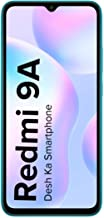

In [151]:
from IPython.display import Image
Image('https://m.media-amazon.com/images/I/71sxlhYhKWL._AC_UY218_.jpg') 

### Eighth Program

Write a python program to extract information about the local weather from the National Weather Service website of USA, https://www.weather.gov/ for the city, San Francisco. You need to extract data about 7 day extended forecast display for the city. The data should include period, short description, temperature and description.

In [348]:
import requests
import re
from bs4 import BeautifulSoup


url_link = 'https://forecast.weather.gov/MapClick.php?lat=37.77493000000004&lon=-122.41941999999995#.YRszCogzZPY'
response = requests.get(url_link)
soup = BeautifulSoup(response.content,'lxml')
pattern =  re.compile('around ([0-9]*)|near ([0-9]*)')
temperature=[]

Period= [i.text for i in soup.find_all('div',class_='col-sm-2 forecast-label')]
short_desc = [i.text.split(',')[0] for i in soup.find_all('div',class_='col-sm-10 forecast-text')]
description= [i.text for i in soup.find_all('div',class_='col-sm-10 forecast-text')] 
for i in soup.find_all('div',class_='col-sm-10 forecast-text'):
    if pattern.findall(i.text)[0][0]:
        temperature.append(pattern.findall(i.text)[0][0] + ' °F')
    if pattern.findall(i.text)[0][1]:
        temperature.append(pattern.findall(i.text)[0][1] + ' °F')

df=pd.DataFrame(list(zip(Period,short_desc,temperature,description)),columns=['Period','Short_description','Temperature','Description'])

In [349]:
df

,Period,Short_description,Temperature,Description
0,Tonight,Mostly clear,57 °F,"Mostly clear, with a low around 57. Light sout..."
1,Wednesday,Widespread haze after 1pm. Sunny,71 °F,"Widespread haze after 1pm. Sunny, with a high ..."
2,Wednesday Night,Widespread haze before 2am. Partly cloudy,57 °F,"Widespread haze before 2am. Partly cloudy, wit..."
3,Thursday,Sunny,69 °F,"Sunny, with a high near 69. Breezy, with a wes..."
4,Thursday Night,Partly cloudy,57 °F,"Partly cloudy, with a low around 57. Breezy, w..."
5,Friday,Mostly sunny,68 °F,"Mostly sunny, with a high near 68. Breezy."
6,Friday Night,Mostly cloudy,57 °F,"Mostly cloudy, with a low around 57. Breezy."
7,Saturday,Mostly sunny,66 °F,"Mostly sunny, with a high near 66."
8,Saturday Night,Mostly cloudy,56 °F,"Mostly cloudy, with a low around 56."
9,Sunday,Mostly sunny,67 °F,"Mostly sunny, with a high near 67."


In [77]:
## This program only scraps the data from tombstone

# period , short description, temperature and description
import requests
from bs4 import BeautifulSoup


url_link = 'https://forecast.weather.gov/MapClick.php?lat=37.77493000000004&lon=-122.41941999999995#.YRszCogzZPY'
response = requests.get(url_link)
soup = BeautifulSoup(response.content,'lxml')

main_tombstone= soup.find_all('div',class_='tombstone-container')

period_name=[]
short_desc=[]
temperature=[]
desc=[]

for i in main_tombstone:
    period_name.append(i.find('p').text)
    short_desc.append(i.find('p',class_="short-desc").text)
    temperature.append(i.find('p',{"class":['temp temp-high','temp temp-low']}).text.split(':')[1])
    desc.append(i.find('img').get('alt').split(':')[1].strip())
    


pd.DataFrame(list(zip(period_name,short_desc,temperature,desc)),columns=['period','short_description','temperature','description'])


,period,short_description,temperature,description
0,Overnight,Partly Cloudy,58 °F,"Partly cloudy, with a low around 58. West wind..."
1,Tuesday,Mostly Sunnythen Sunnyand Breezy,69 °F,"Sunny, with a high near 69. Breezy, with a lig..."
2,TuesdayNight,Mostly Clearand Breezythen MostlyClear,57 °F,"Mostly clear, with a low around 57. Breezy, wi..."
3,Wednesday,Mostly Sunnythen Sunnyand Breezy,71 °F,"Sunny, with a high near 71. Breezy, with a lig..."
4,WednesdayNight,Mostly Clearand Breezythen PartlyCloudy,57 °F,"Partly cloudy, with a low around 57. Breezy, w..."
5,Thursday,Mostly Sunnythen Sunnyand Breezy,70 °F,"Sunny, with a high near 70. Breezy."
6,ThursdayNight,Mostly Clearand Breezythen PartlyCloudy,57 °F,"Partly cloudy, with a low around 57. Breezy."
7,Friday,Mostly Sunny,68 °F,"Mostly sunny, with a high near 68."
8,FridayNight,Partly Cloudy,57 °F,"Partly cloudy, with a low around 57."


### Nineth Program
9. Write a python program to scrape fresher job listings from ‘https://internshala.com/’. It should include job title, company name, CTC, and apply date.

In [142]:

    
import requests
from bs4 import BeautifulSoup




def get_job_details(url,page):
    job_title=[]
    company=[]
    ctc=[]
    apply_date=[]
    for i in range(1,page+1):
        response = requests.get(url_link+str(i))
        soup = BeautifulSoup(response.content,'lxml')
        main_div = soup.find_all('div',class_='internship_meta')
        for i in main_div:
            job_title.append(i.find('a').text)
            company.append(i.find('a',class_='link_display_like_text').text.replace('\n','').strip())
            ctc.append(i.find_all('div',class_='item_body')[1].text.strip('\n').strip())
            apply_date.append(i.find_all('div',class_='item_body')[2].text)
    df = pd.DataFrame(list(zip(job_title,company,ctc,apply_date)),columns=['Job_title','Company','CTC','Apply_Date'])
    return df

url_link = 'https://internshala.com/fresher-jobs/page-'
df =get_job_details(url_link,5)



In [144]:
len(df)

200

In [150]:
df.head(30)

,Job_title,Company,CTC,Apply_Date
0,Executive/Senior Executive - Partnerships,Freecharge Payments Technology Private Limited,3 - 4.2 LPA,11 Sep' 21
1,Executive - Sales,Freecharge Payments Technology Private Limited,3 - 3.5 LPA,11 Sep' 21
2,Junior Operations Executive,Freecharge Payments Technology Private Limited,3 - 4 LPA,4 Sep' 21
3,Sales Manager/Omni Sport Leader - Retail,Decathlon Sport India Private Limited,3.3 - 4.5 LPA,21 Aug' 21
4,Subject Matter Expert (Finance/Advance Math),Innovalance Learning Systems,3 - 3.05 LPA,16 Sep' 21
5,Backend Developer,Indycium,4.2 - 4.8 LPA,16 Sep' 21
6,Junior Full Stack Developer,Synergy Labs,3 - 4 LPA,16 Sep' 21
7,Junior Copywriter,Red Tree Design Studio Private Limited,3 LPA,16 Sep' 21
8,Junior Full Stack Developer,Rugas Technologies Private Limited,3 - 3.5 LPA,16 Sep' 21
9,Associate Creative Designer,DrumUp Media,3 LPA,16 Sep' 21


### Tenth Program

10. Write a python program to scrape house details from https://www.nobroker.in/ for any location. It should include house title, location, area, emi and price

##### This is a inifinite scroll website:
    1. There are two ways to scrap it.
        a.) Using the website api to get data
        b.) Using selenium to scroll and scrap data

##### Method -A(Using the website API to fetch the data)

In [382]:
## title,location,emi,price
## location - Chennai, Siruseri
import json
import requests

title=[]
location=[]
emi=[]
price=[]

for i in range(1,7):
    ## api link
    main_url=f'https://www.nobroker.in/api/v1/multi/property/sale/filter?pageNo={i}&searchParam=W3sibGF0IjoxMi44MzUyMTg4LCJsb24iOjgwLjIwMTA4MDQsInBsYWNlSWQiOiJDaElKS2VfYkJXNWFVam9SYTFhUVY2RU9DYVkiLCJwbGFjZU5hbWUiOiJTaXJ1c2VyaSIsInNob3dNYXAiOmZhbHNlfV0=&radius=2.0&orderBy=lastUpdateDate,desc&city=chennai'
    response = requests.get(main_url)
    data =response.content
    data= json.loads(data)

    for i in range(0,11):
        try:
            title.append(data['data'][i]['title'])
            location.append(data['data'][i]['street'])
            emi.append(data['data'][i]['defaultEmi'])
            price.append(data['data'][i]['formattedPrice'])
        
        except:
            pass
df=pd.DataFrame(list(zip(title,location,emi,price)),columns=['Title','Location','EMI','Price'])

In [383]:
df

,Title,Location,EMI,Price
0,1 BHK Flat For Sale In L And T Eden Park In ...,"Old Mahabalipuram Road, Siruseri, Chennai, Tam...","25,791/Month",45 Lacs
1,2 BHK Flat For Sale In Sabari Serenity In Se...,"Semmanjeri, Old Mahabalipuram Road, Chennai, T...","20,633/Month",36 Lacs
2,"1 BHK Flat For Sale In Sabari Serenity, Semm...","Semmanjeri, Old Mahabalipuram Road, Chennai, T...","10,889/Month",19 Lacs
3,"1 BHK Flat For Sale In L And T Eden Park, Si...","Siruseri, SIPCOT IT Park","25,791/Month",45 Lacs
4,3 BHK Flat For Sale In Sabari Serenity In Si...,"mayana poonga salai Voc street, Siruseri,","37,254/Month",65 Lacs
5,2 BHK Flat For Sale In Asvini Ashvita In Sir...,"Semmanjeri, Siruseri, Chennai-603103, Tamil Na...","23,498/Month",41 Lacs
6,3 BHK Flat For Sale In Urbanrise Code Name ...,MR Radha road,"20,919/Month",36.5 Lacs
7,2 BHK Flat For Sale In L And T Eden Park In ...,"Old Mahabalipuram Road, Siruseri, Chennai, Tam...",773/Month,1.35 Lacs
8,"2 BHK Flat For Sale In L And T Eden Park, Si...","Old Mahabalipuram Road, Siruseri, Chennai, Tam...","35,534/Month",62 Lacs
9,2 BHK Flat For Sale In L And T Eden Park Pha...,"M R Radha Rd, Beside SIPCOT IT Park, Siruseri,...","35,534/Month",62 Lacs
